<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/Barrages/SpecificSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from typing import Callable, List, Tuple
from dataclasses import dataclass, field
import matplotlib.pyplot as mpl
import numpy as np
import pathlib, os

In [24]:
if not pathlib.Path("mpl_utils.py").exists():
  os.system( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import mpl_utils as mut
mut.config_plots()

# mpl.rcParams["figure.figsize"] = (12, 3)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [25]:
# flow rate: efficiency: red line of the map 
poly_CQ1: np.poly1d = np.poly1d( np.array([0.16928201, 0.08989368]) )

# flow rate: green line of the map
poly_CQ2: np.poly1d = np.poly1d( np.array([-3.63920467e-04,  9.37677378e-03, 
                                        -9.25873626e-02,  1.75687197e+00]) )

# n11 interpolation domain
n11_min: float =  4.38  # [-]  
n11_max: float = 17.17  # [-]

# dimensionless flow rate
def Q11( n11: float ) -> float:
    assert( n11 >= n11_min ), "n11 small than admissable minimum"
    assert( n11 <= n11_max ), "n11 greater than admissable maximum"
    if n11 < 7.92193:
        return poly_CQ1( n11 ) 
    else:
        return poly_CQ2( n11 )

In [26]:
nn = 100

n11_vec = np.linspace( n11_min, n11_max, nn )
S_vec = np.zeros( nn )

for i, n11 in enumerate( n11_vec ):
    S_vec[i] = np.sqrt( Q11(n11) ) * n11

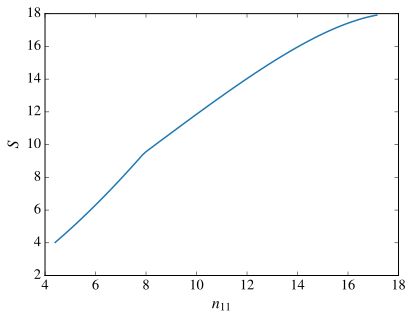

In [27]:
mpl.plot( n11_vec, S_vec )
mpl.xlabel( '$n_{11}$')
mpl.ylabel( '$S$');